# Netflix EDA

### Table of contents:
<a id='table_of_contents'></a>

* [Import libraries](#imports)
* [Import data](#import_data)

#### Tasks:
1. [What is the distribution of Netflix content?](#dist)
2. [What is the most popular release year for movies on netflix?](#popular)
3. [What year did netflix add the most content to its platform?](#content)
4. [Independent of Year, what is the most popular month to add content?](#month)
5. [What is the movie with the longest title in the dataset?](#longest)
6. [Which actor/actress shows up most frequently in the netflix dataset?](#freq)

[Conclusions](#conc)

# Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [73]:
df = pd.read_csv('netflix_titles.csv')
# https://www.kaggle.com/datasets/shivamb/netflix-shows

In [74]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus..."


In [75]:
df.shape

(8807, 12)

In [76]:
df.duplicated().sum()

0

In [77]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Tasks:

# 1. What is the distribution of Netflix content? <a id='dist'></a>
[Back to top](#table_of_contents)

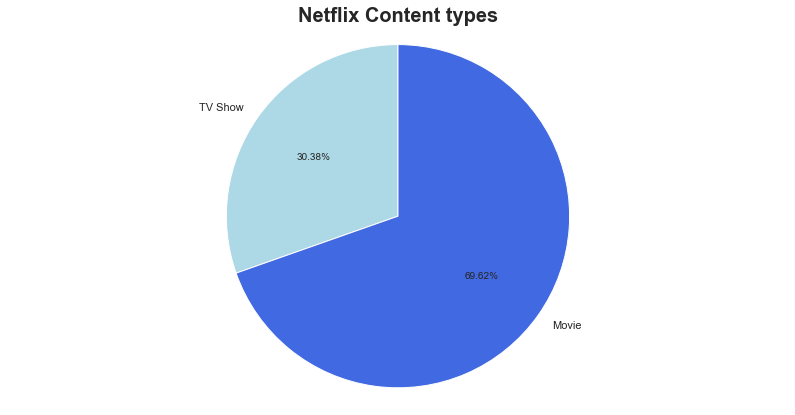

In [78]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,
        colors=['lightblue','royalblue'], startangle=90, autopct='%1.2f%%')
plt.title('Netflix Content types',fontweight="bold", fontsize=20)
plt.axis('equal')
plt.show()

### It can be seen that the distribution is about 30% of TV shows and about 70% of movies

# 2. What is the most popular release year for movies on netflix? <a id='popular'></a>
[Back to top](#table_of_contents)

In [79]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [80]:
movie_df = df[df['type']=='Movie']

In [81]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to pr..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral ..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way for...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, Edin Hasanović, Anna Fialová, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, Mélanie Fouch...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies","After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them."


In [82]:
movie_df['count'] = 1 # create a count column
release_years_summed = movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

<ipython-input-82-69fb1ad8a8f3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
release_years_summed.sort_values(['count'],ascending=False)

,release_year,count
69,2018,767
68,2017,767
67,2016,658
70,2019,633
71,2020,517
...,...,...
12,1961,1
14,1963,1
17,1966,1
5,1947,1


### It can be seen that the years 2017 & 2018 are both the most popular release year for movies on netflix.

# 3. What year did netflix add the most content to its platform? <a id='content'></a>
[Back to top](#table_of_contents)

In [84]:
# Converting the date format
df['new_date'] =  pd.to_datetime(df['date_added'])
df['new_date']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: new_date, Length: 8807, dtype: datetime64[ns]

In [85]:
# Extract the year the movie was added
df['date_added_year'] = df['new_date'].dt.year
df['date_added_year']

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: date_added_year, Length: 8807, dtype: float64

In [86]:
df['count'] = 1  # create a count column
date_added_years_summed = df.groupby(['date_added_year']).sum().reset_index()[['date_added_year','count']]

In [87]:
date_added_years_summed.sort_values(['count'],ascending=False)

,date_added_year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188
8,2016.0,429
7,2015.0,82
6,2014.0,24
3,2011.0,13
5,2013.0,11


### It can be see that in 2019 the most content was added to Netflix with a total of 2016 movies and TV shows.
### It is seen that every year the number of contents increased until 2019 and in 2020 & 2021 there was a certain decrease in the amount of content, apparently because of the pandemic.

# 4. Independent of Year, what is the most popular month to add content? <a id='month'></a>
[Back to top](#table_of_contents)

In [88]:
df['date_added_month'] = df['new_date'].dt.month

In [89]:
date_added_months_summed = df.groupby(['date_added_month']).sum().reset_index()[['date_added_month','count']]

In [90]:
date_added_months_summed.sort_values(['count'],ascending=False)

,date_added_month,count
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760
7,8.0,755
2,3.0,742
0,1.0,738
5,6.0,728
10,11.0,705


### It is seen that the most popular months for adding content are June and December. 
### A possible explanation is that June is the beginning of summer and December is before Christmas and these are months when people have more time to watch new content.

# 5. What is the movie with the longest title in the dataset? <a id='longest'></a>
[Back to top](#table_of_contents)

In [91]:
movie_df = df[df['type']=='Movie']

In [92]:
movie_df['title_length'] = [len(title) for title in movie_df['title']]
movie_df.head(3)

<ipython-input-92-2f57b1b3f1db>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevi...",2021-09-25,2021.0,1,9.0,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to pr...",2021-09-24,2021.0,1,9.0,32
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral ...",2021-09-24,2021.0,1,9.0,7


In [93]:
top_title_lengths = movie_df.sort_values(['title_length'], ascending=False)
print(top_title_lengths.iloc[0]['title'])
print(top_title_lengths.iloc[0]['title_length'])

Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton
104


# 6. Which actor/actress shows up most frequently in the netflix dataset? <a id='freq'></a>
[Back to top](#table_of_contents)

In [94]:
title_and_cast_df = df[['title','cast']]
title_and_cast_df.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera"
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar"


In [95]:
pd.options.display.max_colwidth = 150  # changing the default display to see more of the cast members
title_and_cast_df.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy ..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera"
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar"


In [96]:
title_and_cast_df = title_and_cast_df.dropna()

In [97]:
cast_names_counter = {}

for index, row in title_and_cast_df.iterrows():
    movie_cast = row['cast']
    movie_cast_split = movie_cast.split(',')
    movie_cast_stripped = [name.strip().lower() for name in movie_cast_split] # to get rid of the spaces in the names
    for name in movie_cast_stripped:
        cast_names_counter[name] = cast_names_counter.get(name,0) + 1

dict(sorted(cast_names_counter.items(), key=lambda item: item[1], reverse=True))

{'anupam kher': 43,
 'shah rukh khan': 35,
 'julie tejwani': 33,
 'naseeruddin shah': 32,
 'takahiro sakurai': 32,
 'rupa bhimani': 31,
 'akshay kumar': 30,
 'om puri': 30,
 'yuki kaji': 29,
 'amitabh bachchan': 28,
 'paresh rawal': 28,
 'boman irani': 27,
 'rajesh kava': 26,
 'vincent tong': 26,
 'andrea libman': 25,
 'kareena kapoor': 25,
 'samuel l. jackson': 24,
 'john cleese': 24,
 'jigna bhardwaj': 23,
 'fred tatasciore': 23,
 'tara strong': 23,
 'daisuke ono': 22,
 'junichi suwabe': 21,
 'ajay devgn': 21,
 'ashleigh ball': 21,
 'kay kay menon': 21,
 'nicolas cage': 21,
 'nawazuddin siddiqui': 21,
 'adam sandler': 20,
 'david attenborough': 20,
 'salman khan': 20,
 'david spade': 19,
 'yuichi nakamura': 19,
 'erin fitzgerald': 19,
 'mamoru miyano': 19,
 'morgan freeman': 19,
 'james franco': 19,
 'seth rogen': 19,
 'ai kayano': 19,
 'fred armisen': 19,
 'gulshan grover': 19,
 'vatsal dubey': 18,
 'rajesh sharma': 18,
 'fortune feimster': 18,
 'diana kaarina': 18,
 'yashpal sharma

### It can be seen that anupam kher is the actor that shows up most frequently in the netflix dataset with 43 movies/TV shows.

# Conclusions: <a id='conc'></a>
[Back to top](#table_of_contents)

### 1. What is the distribution of Netflix content?
It can be seen that the distribution is about 30% of TV shows and about 70% of movies

### 2. What is the most popular release year for movies on netflix?
It can be seen that the years 2017 & 2018 are both the most popular release year for movies on netflix.

### 3. What year did netflix add the most content to its platform?
It can be see that in 2019 the most content was added to Netflix with a total of 2016 movies and TV shows.
It is seen that every year the number of contents increased until 2019 and in 2020 & 2021 there was a certain decrease in the amount of content, apparently because of the pandemic.

### 4. Independent of Year, what is the most popular month to add content?
It is seen that the most popular months for adding content are June and December. 
A possible explanation is that June is the beginning of summer and December is before Christmas and these are months when people have more time to watch new content.

### 5. What is the movie with the longest title in the dataset?
Longest title: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton

Length: 104

### 6. Which actor/actress shows up most frequently in the netflix dataset?
It can be seen that anupam kher is the actor that shows up most frequently in the netflix dataset with 43 movies/TV shows.